---
### Universidad de Costa Rica
#### IE0405 - Modelos Probabilísticos de Señales y Sistemas
---

- Estudiante: **Vásquez Marín Kevin Fernando**
- Carné: **B78171**
- Grupo: **1/2**


# `P5` - *Procesos M/M/s*

---
## - Asignaciones

Es menester tomar una decisión con respecto al número de "servidores" necesarios para cierto proceso de vacunación, de forma tal que el sistema no exceda 50 personas en fila durante el 95% del tiempo de servicio. 

En un estudio de afluencia y del tiempo de servicio se asumen y determinan los siguientes parámetros:

- La tasa de llegada $\lambda$ es constante durante ocho horas de funcionamiento y tiene un valor de $\lambda = 4$ personas por minuto.

- La tasa de servicio $\nu$ de cada "servidor" (es decir, personal de salud tomando datos y vacunando) es constante durante ocho horas de funcionamiento y tiene un valor de $\nu = 0.25$ personas por minuto.

Entonces,

- (40%) Hacer la determinación teórica del número $s$ de servidores necesarios para cumplir el requisito.


Sea $i$ el número de personas en el sistema, se tiene entonces:

$$
P( \text{51 o más personas en el sistema} ) = \sum_{i=51}^{\infty} (1 - \rho) \rho^i  = 1 - \sum_{i=0}^{50} (1 - \rho) \rho^i = \rho^{51}
$$

La probabilidad de que la fila sea de 50 personas es de 95 %, por lo tanto, para que el asunto colapse:

$$  100 \: \% - 95\: \% = 5 \: \%  = 0.05 $$



Por la condición dada, se debe de cumplir:
    $$  \sum_{i=51}^{\infty} (1 - \rho) \rho^i  = 1 - \sum_{i=0}^{50} (1 - \rho) \rho^i = \rho^{51} < 0.05     $$
    
El factor de uso en el sistema, $\rho$, al tratarse de un proceso M/M/s estará dado por: 

$$  \rho = \frac{\lambda}{\nu s}    $$

Combinando las ecuaciones anteriores:

$$   \left( \frac{\lambda}{\nu s} \right) ^{51} = \left( \frac{4}{0.25s} \right) ^{51}  < 0.05       $$

En donde, despejando, finalmente se tiene el valor de los servidores $s$ necesarios.


$$   s > 16.968    $$

Por lo tanto se necesitan 17 servidores.

- (60%) Modificar el código provisto para simular y corroborar el resultado anterior y crear al menos dos gráficas que muestren esta simulación

Parámetro lambda = 4.0
Parámetro nu = 0.25
Tiempo con más de 3 solicitudes en fila:
	 73.10%
	 No cumple con la especificación.
Simulación es equivalente a 0.40 horas.


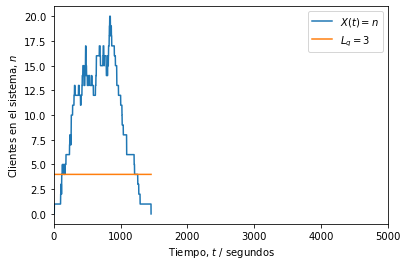

In [40]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Número de clientes
N = 50

# Parámetro de llegada (clientes/segundos)
lam = 4/60

# Parámetro de servicio de cada servidor (servicios/segundos)
nu = 0.25/60

#servidores

s = 17


# Distribución de los tiempos de llegada entre cada cliente
X = stats.expon(scale = 1/lam)

# Distribución de los tiempos de servicio a cada cliente
Y = stats.expon(scale = 1/nu)

# Intervalos entre llegadas (segundos desde último cliente)
t_intervalos = np.ceil(X.rvs(N)).astype('int')

# Tiempos de las llegadas (segundos desde el inicio)
t_llegadas = [t_intervalos[0]]
for i in range(1, len(t_intervalos)):
    siguiente = t_llegadas[i-1] + t_intervalos[i]
    t_llegadas.append(siguiente)

# Tiempos de servicio (segundos desde inicio de servicio)
t_servicio = np.ceil(Y.rvs(N)).astype('int')



#Vectores con los tiempos de fin de servicio de cada servidor
servidores = np.zeros(s)


# Inicialización del tiempo de inicio y fin de atención
inicio = t_llegadas[0]          # primera llegada
fin = inicio + t_servicio[0]    # primera salida


#Asignación del primer cliente

servidores[0] = fin


# Tiempos en que recibe atención cada i-ésimo cliente (!= que llega)
t_atencion = [inicio]
for i in range(1, N):
    desocupados = np.where(servidores <= t_llegadas[i])
    if desocupados ==0 :
        inicio = min(servidores)+1
        fin = inicio + t_servicio[i]
        #Asignación de servidor
        j = np.where(servidores == min(servidores))
        servidores[j] = fin
    else:
        inicio = t_llegadas[i]
        final = inicio + t_servicio[i]
        #Asignación del servidor
        j = np.where(servidores == min(servidores))
        servidores[j] = fin
        
        
    t_atencion.append(inicio)

    

# Inicialización del vector temporal para registrar eventos
t = np.zeros(t_atencion[-1] + t_servicio[-1] + 1)

# Asignación de eventos de llegada (+1) y salida (-1) de clientes
for c in range(N):
    i = t_llegadas[c]
    t[i] += 1
    j = t_atencion[c] + t_servicio[c]
    t[j] -= 1

# Umbral de P o más personas en sistema (hay P - 1 en fila)
P = 5

# Instantes (segundos) de tiempo con P o más solicitudes en sistema
exceso = 0

# Proceso aleatorio (estados n = {0, 1, 2...})
Xt = np.zeros(t.shape)

# Inicialización de estado n
n = 0

# Recorrido del vector temporal y conteo de clientes (estado n)
for i, c in enumerate(t):
    n += c # sumar (+1) o restar (-1) al estado
    Xt[i] = n
    if Xt[i] >= P: 
        exceso += 1

# Fracción de tiempo con P o más solicitudes en sistema
fraccion = exceso / len(t)

# Resultados
print('Parámetro lambda =', str(lam*60))
print('Parámetro nu =', str(nu*60))
print('Tiempo con más de {} solicitudes en fila:'.format(P-2))
print('\t {:0.2f}%'.format(100*fraccion))
if fraccion <= 0.01:
    print('\t Sí cumple con la especificación.')
else:
    print('\t No cumple con la especificación.') 
print('Simulación es equivalente a {:0.2f} horas.'.format(len(t)/3600))

# Gráfica de X(t) (estados del sistema)
plt.figure()
plt.plot(Xt)
plt.plot(range(len(t)), (P-1)*np.ones(t.shape))
plt.legend(('$X(t) = n$', '$L_q = $' + str(P-2)))
plt.ylabel('Clientes en el sistema, $n$')
plt.xlabel('Tiempo, $t$ / segundos')
plt.xlim((0, 5000))
plt.show()